## 웹스크래핑
- 웹에서 원하는 정보를 얻기위해 하는 행동

## requests
- requests: html의 문서정보를 불러오기 위해 사용

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [13]:
# requests를 통해 URL에 있는 html문서를 가지고 옴
import requests
res = requests.get("http://www.naver.com")

In [14]:
# 실제로 우리가 페이지 접속을 하려고 할때, 정보를 잘 받아왔는지 혹은 
#   페이지에 대한 접속 권한이 없는지, 페이지에 문제가 없는지, 서버에 문제가 없는지 등등..
# 위와 같은 문제가 발생하지는 않았는지 응답코드를 찍어봐야 한다.
print("응답코드: ", res.status_code)    # 200: 정상 

응답코드:  200


- 응답코드 에러
    - `403`: 페이지 접속 권한이 없다

In [15]:
# 응답여부 확인 방법1
if res.status_code == requests.codes.ok:
    print("정상입니다")
else:
    print(f'문제가 생겼습니다. [에러코드 {res.status_code}]')

정상입니다


In [16]:
# 응답여부 확인 방법2
# 만약 접근 권한이 없는 페이지에 아래와 같이 확인한다면, 그 자리에서 오류를 내뱉고 프로그램을 끝낼 수 있게 해줌
res.raise_for_status()  # 웹스트래핑을 위해 html 문서를 잘 가져왔다면 문제X, 그렇지 않으면 에러처리
print("웹 스크래핑을 진행합니다.")

웹 스크래핑을 진행합니다.


In [ ]:
# 정리
res = requests.get("http://www.naver.com")
res.raise_for_status()

In [17]:
# 네이버에서 받은 html 문서의 글자 개수가 출력
print(len(res.text))

165665



<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
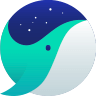
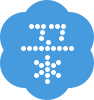

In [18]:
# html에 어떤 내용이 담겨 있는지 확인
print(res.text)

In [19]:
# html에 담긴 내용을 파일로 만들어 확인
# with open("파일명", "w==쓰기모드", encoding="한글 깨짐방지")
with open("mynaver.html", "w", encoding="utf8") as f: 
    f.write(res.text)

## 순서
1. `res = requests.get("URL")` : requests를 통해 원하는 페이지에 접속
2. `res.raise_for_status` : 정상적으로 정보를 받았는지 확인
3. `with open("파일명", "w==쓰기모드", encoding="한글 깨짐방지") as f: f.write(res.text)` : 파일로 확인